```jupyter lab --port=44000 --ip=$HOSTNAME --no-browser```

# Reward

In [11]:
import numpy as np
from dm_control.utils import rewards
x = np.linspace(-2, 2, 100)

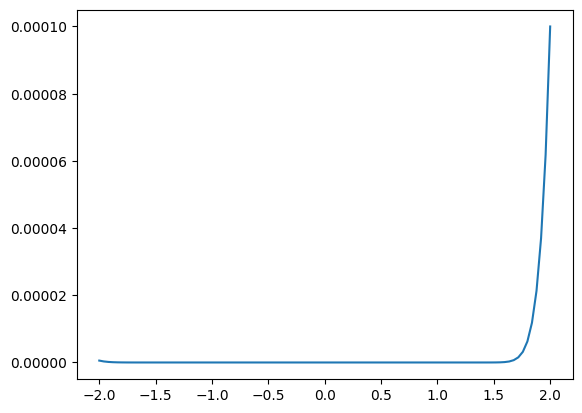

In [16]:
y = rewards.tolerance(1/x, bounds=(0, 0.1), margin=0.2, sigmoid='gaussian')
plt.plot(x, y, label='gaussian')

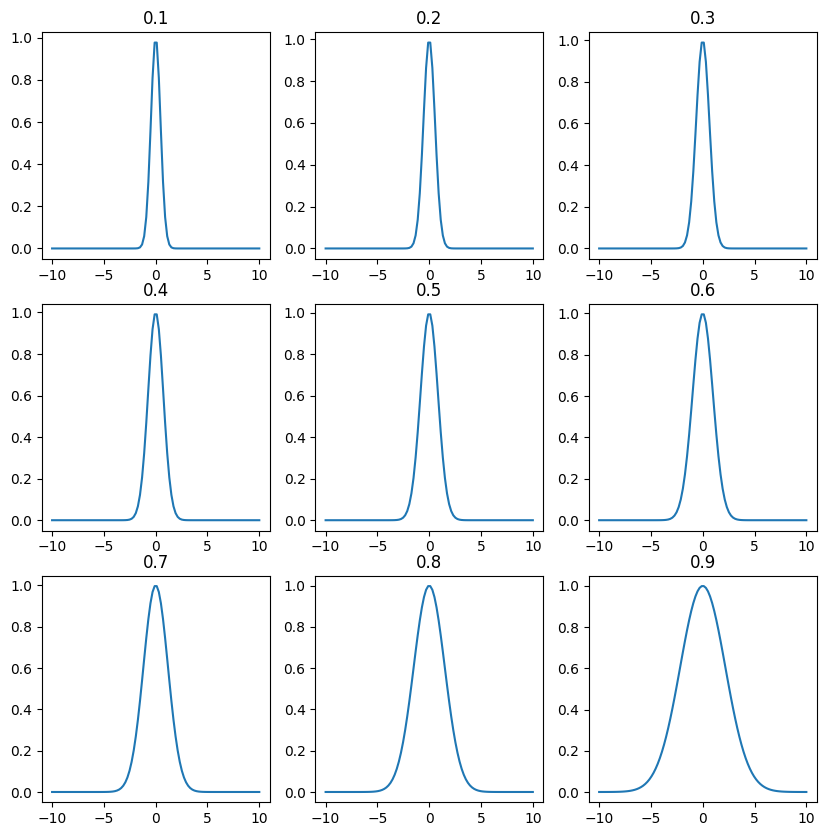

In [8]:
import matplotlib.pyplot as plt
y = rewards._sigmoids(x, 0.5, "gaussian")
# add subplot
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
values = np.array([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6],
                   [0.7, 0.8, 0.9]])
for (i, j), v in np.ndenumerate(values):
    y = rewards._sigmoids(x, v, "gaussian")
    ax[i, j].plot(x, y)
    ax[i, j].set_title(f"{v}")

# Play

In [37]:
%reload_ext autoreload
from dm_control import composer
from env.task import SingleStepTask, TwoStepTask

In [38]:
single_step_task = SingleStepTask()
env = composer.Environment(single_step_task)
ini = env.reset()
obs = env.step(env.action_spec().minimum)

In [39]:
env.action_spec()

BoundedArray(shape=(7,), dtype=dtype('float64'), name='arm/actuator_1\tarm/actuator_2\tarm/actuator_3\tarm/actuator_4\tarm/actuator_5\tarm/actuator_6\tarm/actuator_7', minimum=[-87. -87. -87. -87. -12. -12. -12.], maximum=[87. 87. 87. 87. 12. 12. 12.])

In [21]:
import sys
from env.task import SingleStepTask, TwoStepTask

sys.modules['env'].task.SingleStepTask()

In [3]:
env._observation_updater._enabled_structure

{'time': <dm_control.composer.observation.updater._EnabledObservable at 0x12f3786a0>,
 'distance': <dm_control.composer.observation.updater._EnabledObservable at 0x12f378580>,
 'whip_distance': <dm_control.composer.observation.updater._EnabledObservable at 0x12f379d20>,
 'arm/arm_joints_qacc': <dm_control.composer.observation.updater._EnabledObservable at 0x12f379fc0>,
 'arm/arm_joints_qpos': <dm_control.composer.observation.updater._EnabledObservable at 0x12f37a1a0>}

In [7]:
for k, v in env.observation_spec().items():
    print(k, v.shape)

time (1,)
distance (1,)
whip_distance ()
arm/arm_joints_qacc (7,)
arm/arm_joints_qpos (1, 7)


Box([-87. -87. -87. -87. -12. -12. -12.], [87. 87. 87. 87. 12. 12. 12.], (7,), float32)
Box(-inf, inf, (9,), float32)


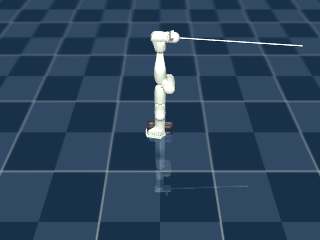

In [4]:
from IPython.display import display
from PIL import Image
from env.dm2gym import EnvDMControl

env = EnvDMControl('SingleStepTask')
env.reset()
print(env.action_space)
print(env.observation_space)
# display numpy array as image

img = Image.fromarray(env.physics.render())
display(img)

任务版本说明

|ID | Task Name     |Version|Control Method|Whip Type|Target Mode|  Inital Arm Position  |Noise| Action  |
|:-:|:-------------:|:-----:|:------------:|:-------:|:---------:|:---------------------:|:---:|:-------:|
|1  |SingleStepTask |v0     |Position      |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|2  |SingleStepTask |v1     |Position      |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|3  |SingleStepTask |v3     |Torque        |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|4  |SingleStepTask |v4     |Torque        |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|5  |TwoStepTask    |v0     |Position      |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|5  |TwoStepTask    |v1     |Position      |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |unfixed  |
|5  |TwoStepTask    |v2     |Position      |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|6  |TwoStepTask    |v3     |Position      |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |unfixed  |
|5  |TwoStepTask    |v4     |Torque        |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|5  |TwoStepTask    |v5     |Torque        |0:MIT    |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |unfixed  |
|5  |TwoStepTask    |v6     |Torque        |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |fixed0.5s|
|6  |TwoStepTask    |v7     |Torque        |1:Mujoco |100 points |(0, 0, 0, 0, 0, 1.5, 0)|w/o  |unfixed  |

In [1]:
import gymnasium as gym
from gymnasium.envs.registration import register
from env.dm2gym import EnvDMControl

register(
     id="SingleStepTask-v1",
     entry_point=EnvDMControl,
     max_episode_steps=300,
     vector_entry_point=EnvDMControl,
     kwargs={"name": "SingleStepTask-v1"}
)

In [2]:
gym.envs.registry["SingleStepTask-v1"]

EnvSpec(id='SingleStepTask-v1', entry_point=<class 'env.dm2gym.EnvDMControl'>, reward_threshold=None, nondeterministic=False, max_episode_steps=300, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'name': 'SingleStepTask-v1'}, namespace=None, name='SingleStepTask', version=1, additional_wrappers=(), vector_entry_point=<class 'env.dm2gym.EnvDMControl'>)

In [ ]:
from env.dm2gym import make_vectorized_envs
from env.dm2gym import make_env
envs = make_vectorized_envs(2, 0, 0.99, asynchronous=True, capture_video=False, env_id='SingleStepTask-v1')

$$
\text{Rollouts Data} = \text{Env num} * \text{Steps num}

$$

In [16]:
envs.single_observation_space.shape
import torch
torch.zeros((128, 4) + envs.single_observation_space.shape).shape
envs.single_action_space

Box([-87. -87. -87. -87. -12. -12. -12.], [87. 87. 87. 87. 12. 12. 12.], (7,), float32)

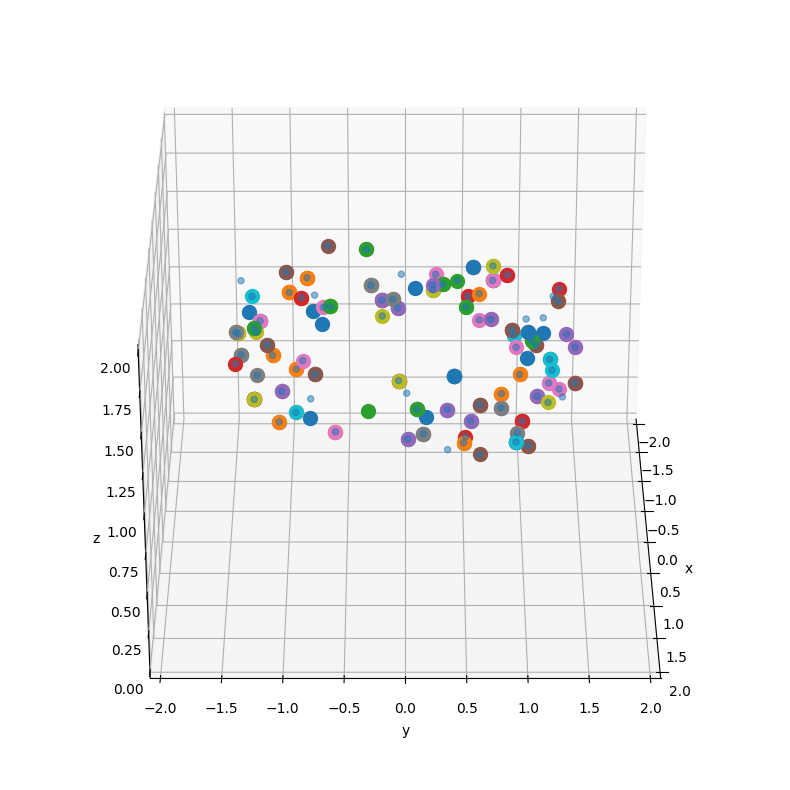

In [66]:
from env.task import FixedRandomPos
fixed_pos = FixedRandomPos(n=100)
points = fixed_pos.targets
point = fixed_pos()

# make a video for the 3d scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
# create animation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=20, alpha=0.5)
ax.scatter(point[0], point[1], point[2], s=100, alpha=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
def update(i):
    point = fixed_pos()
    ax.view_init(30, i)
    ax.scatter(point[0], point[1], point[2], s=100, alpha=1)
    return ax
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, 200, 1), interval=30)
HTML(anim.to_html5_video())
0

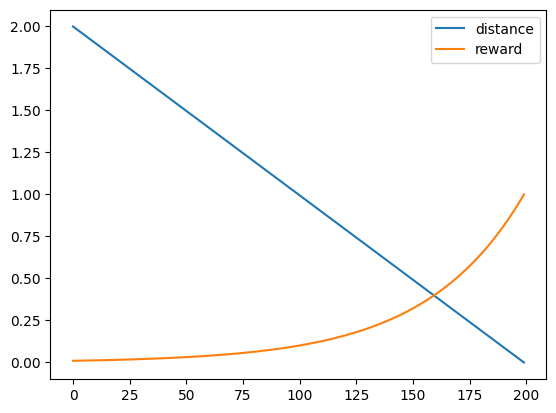

In [2]:
import numpy as np
distance = np.linspace(2, 0, 200)
reward = 10 ** -distance

# plot
import matplotlib.pyplot as plt
plt.plot(distance, label='distance')
plt.plot(reward, label='reward')
plt.legend()
plt.show()

# Test Single Task

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import copy
import numpy as np
from dm_control import composer
from env.task import SingleStepTask
from env.utils import display_video

In [3]:
# pretty display a dict
def display_dict(d, name="Dict Name"):
    print(f"{name}:")
    for k, v in d.items():
        print(f"\t{k} : {v}")

获取初始状态的数据

In [4]:
single_step_task = SingleStepTask(target=0)
single_step_task.set_timesteps(2, 0.02)
env = composer.Environment(single_step_task)
env.reset()
key_frame_1 = env.physics.data.qpos
key_frame_1

array([ 1.94554078e-04,  2.14750126e-03,  3.39502991e-05, -3.30299255e-01,
       -5.63442080e-04,  2.27793041e-02,  1.74814756e-03, -2.01016613e-01,
        2.35287420e-02, -1.10745372e-01,  1.33430657e-02, -6.33656953e-02,
        8.28183647e-03, -3.80109847e-02,  6.12615765e-03, -2.52217774e-02,
        5.24265351e-03, -1.67522289e-02,  3.33613481e-03, -1.36889706e-02,
        2.07464681e-03, -1.37121126e-02,  3.53944464e-03, -1.34581836e-02,
        4.52296711e-03, -1.28308707e-02,  5.17379965e-03, -1.38731480e-02,
        7.20811993e-03, -1.49824154e-02,  8.28500445e-03, -1.61220593e-02,
        8.70748457e-03, -1.75925399e-02,  9.52036647e-03, -1.90088823e-02,
        1.05211317e-02, -1.93481261e-02,  1.10960942e-02, -1.73823887e-02,
        1.05858611e-02, -1.15217481e-02,  8.33064990e-03,  1.87467557e-04,
        3.61796101e-03,  1.97248685e-02, -4.49516326e-03,  4.84197498e-02,
       -1.66752753e-02,  8.67328836e-02, -3.34145100e-02,  1.34580639e-01,
       -5.36959499e-02,  

In [6]:
env.step([0,0,0,0,0,0,0])
key_frame_2 = env.physics.data.qpos
key_frame_2

array([ 1.94554078e-04,  2.14750126e-03,  3.39502991e-05, -3.30299255e-01,
       -5.63442080e-04,  2.27793041e-02,  1.74814756e-03, -2.01016613e-01,
        2.35287420e-02, -1.10745372e-01,  1.33430657e-02, -6.33656953e-02,
        8.28183647e-03, -3.80109847e-02,  6.12615765e-03, -2.52217774e-02,
        5.24265351e-03, -1.67522289e-02,  3.33613481e-03, -1.36889706e-02,
        2.07464681e-03, -1.37121126e-02,  3.53944464e-03, -1.34581836e-02,
        4.52296711e-03, -1.28308707e-02,  5.17379965e-03, -1.38731480e-02,
        7.20811993e-03, -1.49824154e-02,  8.28500445e-03, -1.61220593e-02,
        8.70748457e-03, -1.75925399e-02,  9.52036647e-03, -1.90088823e-02,
        1.05211317e-02, -1.93481261e-02,  1.10960942e-02, -1.73823887e-02,
        1.05858611e-02, -1.15217481e-02,  8.33064990e-03,  1.87467557e-04,
        3.61796101e-03,  1.97248685e-02, -4.49516326e-03,  4.84197498e-02,
       -1.66752753e-02,  8.67328836e-02, -3.34145100e-02,  1.34580639e-01,
       -5.36959499e-02,  

In [64]:
all_joints = env.task.root_entity.mjcf_model.find_all("joint")
env.physics.bind(all_joints).qpos = key_frame_2

In [8]:
# Simulate episode with random actions
np.set_printoptions(precision=3)
duration = 2  # Seconds
frames = []
ticks = []
ctrls = []
rewards = []
observations = []

single_step_task = SingleStepTask(target=0)
single_step_task.set_timesteps(0.04, 0.02)
env = composer.Environment(single_step_task)
env.reset()
obs_spec = env.observation_spec()
action_spec = env.action_spec()
display_dict(obs_spec, "Observation Spec")
print(action_spec)

def sample_random_action(mask = None):
    action = env.random_state.uniform(
        low=action_spec.minimum * 0.7,
        high=action_spec.maximum * 0.7,
        ).astype(action_spec.dtype, copy=False)
    if mask is not None:
        action *= mask
    return action

env.reset()
env.task.time_limit = duration
action = sample_random_action()
while env.physics.data.time < env.task.time_limit:
    time_step = env.step(action)
    # get control values
    ctrls.append(np.array(env.physics.bind(env.task.entities.arm.arm_joints).qpos))
    rewards.append(time_step.reward)
    observations.append(copy.deepcopy(time_step.observation))
    ticks.append(env.physics.data.time)
    camera0 = env.physics.render(height=400, width=400)
    frames.append(camera0)

display_video(frames, framerate=1./env.control_timestep())

Observation Spec:
	arm/arm_joints_qpos : Array(shape=(1, 7), dtype=dtype('float64'), name='arm/arm_joints_qpos')
	arm/whip/whip_end_xpos : Array(shape=(1, 3), dtype=dtype('float64'), name='arm/whip/whip_end_xpos')
	target/target_xpos : Array(shape=(1, 3), dtype=dtype('float64'), name='target/target_xpos')
BoundedArray(shape=(7,), dtype=dtype('float64'), name='arm/actuator_1\tarm/actuator_2\tarm/actuator_3\tarm/actuator_4\tarm/actuator_5\tarm/actuator_6\tarm/actuator_7', minimum=[-2.897 -1.763 -2.897 -3.072 -2.897 -0.018 -2.897], maximum=[ 2.897  1.763  2.897 -0.07   2.897  3.752  2.897])


In [7]:
obs_keys = ['distance',
            'arm/arm_joints_qpos',
            'arm/arm_joints_qvel',
            'arm/whip/whip_end_xpos',
            'target/target_xpos']
distance = np.array([obs['distance'] for obs in observations]).squeeze().T
source = np.array([obs['arm/whip/whip_end_xpos'] for obs in observations]).squeeze().T
target = np.array([obs['target/target_xpos'] for obs in observations]).squeeze().T
rewards = np.array(rewards).squeeze()
ctrls = np.array(ctrls).squeeze()

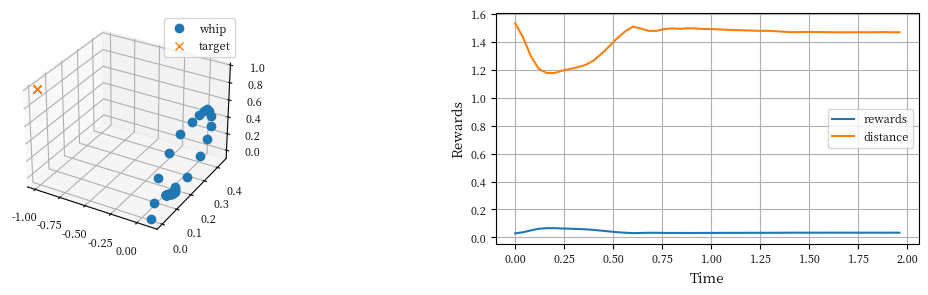

In [8]:
%matplotlib inline
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure(figsize=(12, 3))
canvas = FigureCanvas(fig)
ax0 = fig.add_subplot(131, projection='3d')
ax0.plot(source[0], source[1], source[2], "o", label="whip")  # Plot contour curves
ax0.plot(target[0], target[1], target[2], "x", label="target")  # Plot contour curves
ax0.legend()
ax1 = fig.add_subplot(122)
times = np.arange(len(rewards)) * env.control_timestep()
ax1.plot(times,rewards,label="rewards")
ax1.plot(times, distance, label="distance")
ax1.legend()
ax1.grid()
ax1.set_xlabel("Time"); ax1.set_ylabel("Rewards")
plt.show()

all font list get from matplotlib.font_manager:
设置matplotlib字体为中文黑体


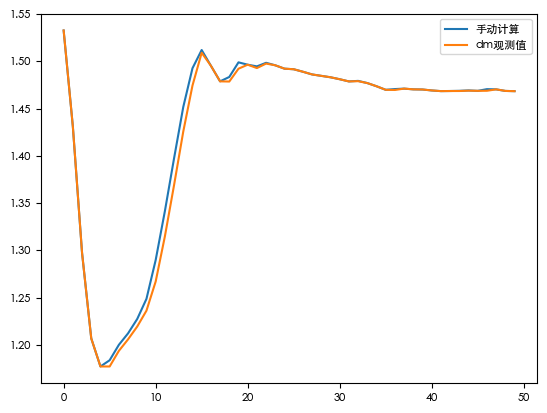

In [10]:
import matplotlib
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for i, f in enumerate(sorted(mpl_fonts)):
    if f == "Heiti TC":
        print("设置matplotlib字体为中文黑体")
        matplotlib.rc("font",family='Heiti TC')

dist1 = np.linalg.norm(source - target, axis=0)
dist2 = distance
plt.plot(dist1, label="手动计算")
plt.plot(dist2, label="dm观测值")
plt.legend()

# Test Gym

In [20]:
!pwd
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torchinfo import summary
from env.dm2gym import WhippingGym, make_vectorized_envs
from RL.ppo_continuous_action import Agent

/work3/s213120/whipping_targets
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 单个Env

In [2]:
env = WhippingGym("SingleStepTask-v0")
env.action_space
env.observation_space

In [39]:
env.action_space

Box([-2.8973 -1.7628 -2.8973 -3.0718 -2.8973 -0.0175 -2.8973], [ 2.8973  1.7628  2.8973 -0.0698  2.8973  3.7525  2.8973], (7,), float32)

### 并行Env

In [60]:
envs = make_vectorized_envs(env_id="SingleStepTask-v0",
                            num_envs=4,
                            asynchronous=True,
                            gamma=0.99,
                            ctrl_type="torque",
                            target=0)
envs.reset(seed=0)

rand_actions = envs.action_space.sample()
time_step = envs.step(rand_actions)

In [61]:
time_step

(array([[-0.707005  , -0.7065261 , -0.70700705,  0.70704126, -0.70208585,
         -0.70545256, -0.7013987 , -0.7067198 , -0.70649564, -0.7037677 ,
         -0.00408214,  0.        ,  0.00408214],
        [-0.7070016 , -0.7070408 , -0.7069991 ,  0.70705783,  0.7038265 ,
         -0.6874435 , -0.6963639 , -0.70640934, -0.70657885, -0.70376515,
         -0.00408214,  0.        ,  0.00408214],
        [-0.7070044 , -0.7063484 , -0.7070072 ,  0.7070585 , -0.7016931 ,
         -0.7054283 , -0.7012132 , -0.706738  , -0.70645636, -0.70377475,
         -0.00408214,  0.        ,  0.00408214],
        [ 0.7068463 ,  0.70682997,  0.6746285 ,  0.7070519 , -0.7030183 ,
         -0.70517373, -0.7009652 , -0.70486003,  0.7040984 , -0.7041347 ,
         -0.00408214,  0.        ,  0.00408214]], dtype=float32),
 array([2.97106166, 3.04054713, 2.97106166, 2.96897804]),
 array([ True,  True,  True,  True]),
 array([False, False, False, False]),
 {'final_observation': array([array([ 0.99989148,  0.99898889

### 代理

1. beta分布的agent

In [26]:
%reload_ext autoreload
from RL.ppo_continuous_action import Agent
agent0 = Agent(envs, 32, "beta", True)
obs = torch.as_tensor(envs.single_observation_space.sample(), dtype=torch.float32).reshape(1, -1)
agent0(obs)

(tensor([[ 1.8355,  1.0951,  1.4445, -0.6092,  0.8787,  3.6076,  1.2211]]),
 tensor([[0.3276]], grad_fn=<SumBackward1>),
 tensor([[-0.0416]], grad_fn=<SumBackward1>),
 tensor([[0.0282]], grad_fn=<AddmmBackward0>))

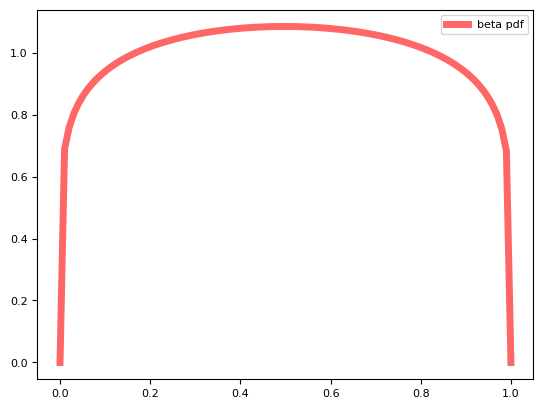

In [55]:
from torch.nn import functional as F
from scipy.stats import beta
import matplotlib.pyplot as plt
def get_distribution(agent, x):
    aa = (F.softmax(agent.actor_alpha(x), dim=-1) + 1)
    bb = (F.softmax(agent.actor_beta(x), dim=-1) + 1)
    return aa, bb

def plot_beta_dist(agent, obs):
    aa, bb = get_distribution(agent, obs)
    a, b = aa[0,0].item(), bb[0,0].item()
    x = np.linspace(0, 1, 100)
    high, low = 2.8973, -2.8973
    x_ = x * (high - low) + low     # scale to [-2.8973, 2.8973]
    x_ = (x_ - low) / (high - low)  # scale to [0, 1]
    plt.plot(x_, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
    plt.legend()
    plt.show()

plot_beta_dist(agent0, obs)

2. 高斯分布的agent

In [46]:
agent1 = Agent(envs, 32, "normal", True)
obs = torch.as_tensor(envs.single_observation_space.sample(), dtype=torch.float32).reshape(1, -1)
agent1(obs)

(tensor([[-0.3253,  1.1638, -0.1595,  0.7469,  0.0605, -0.4620, -0.8349]]),
 tensor([[-7.9217]], grad_fn=<SumBackward1>),
 tensor([[9.9326]], grad_fn=<SumBackward1>),
 tensor([[-0.8021]], grad_fn=<AddmmBackward0>))

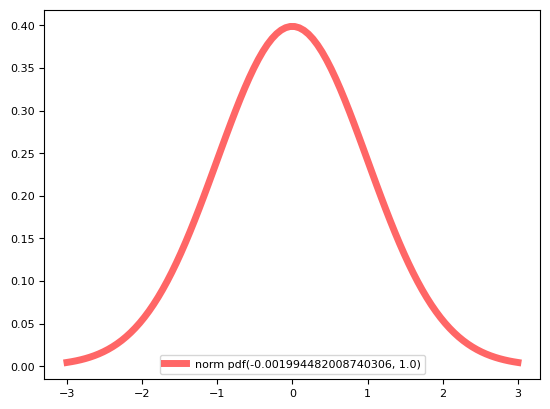

In [58]:
from torch.nn import functional as F
from scipy.stats import norm
import matplotlib.pyplot as plt
def get_distribution(agent, x):
    mu = agent.actor_mean(x)[0,0].item()
    sigma = agent.actor_logstd.exp()[0,0].item()
    high, low = 2.8973, -2.8973
    x = np.linspace(int(low)-1, int(high)+1, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=5, alpha=0.6, label=f'norm pdf({mu}, {sigma})')
    plt.legend()
    plt.show()
    

get_distribution(agent1, obs)

# Train Evaluation

In [1]:
%load_ext autoreload
%autoreload 2

载入训练后的代理

In [12]:
import numpy as np
import torch
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
agent = torch.load("SingleStepTask-v0__HPCtest__42__1684881416-update1050.pth",
                   map_location=device)

载入环境

In [19]:
import copy
import numpy as np
from dm_control import composer
from env.task import SingleStepTask
from env.utils import display_video
single_step_task = SingleStepTask(ctrl_type='position',
                                  whip_type=0,
                                  target=0)
single_step_task.set_timesteps(0.04, 0.02)
env = composer.Environment(single_step_task)

对训练后的代理进行可视化

In [23]:
# Simulate episode with random actions
np.set_printoptions(precision=3)
duration = 2  # Seconds
frames = []
ticks = []
ctrls = []
rewards = []
observations = []

episodes = duration // env.task.time_limit
for i in range(episodes):
    init_obs = np.hstack(list(env.reset().observation.values())) # flatten the observation
    init_obs = torch.Tensor(init_obs).to(device)
    action, _, _ = agent.policy(init_obs)
    action = action[0].cpu().numpy()
    while env.physics.data.time < env.task.time_limit:
        time_step = env.step(action)
        # get control values
        rewards.append(time_step.reward)
        observations.append(copy.deepcopy(time_step.observation))
        ticks.append(env.physics.data.time)
        camera0 = env.physics.render(height=400, width=400)
        frames.append(camera0)

display_video(frames, framerate=1./env.control_timestep())

/var/folders/0g/4n6rzj1n21n6dlmfrdjkpj9m0000gn/T/ipykernel_1355/758669771.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  init_obs = np.hstack(env.reset().observation.values()) # flatten the observation


绘制鞭子末端3D轨迹图和奖励曲线（这里展示了两个回合）

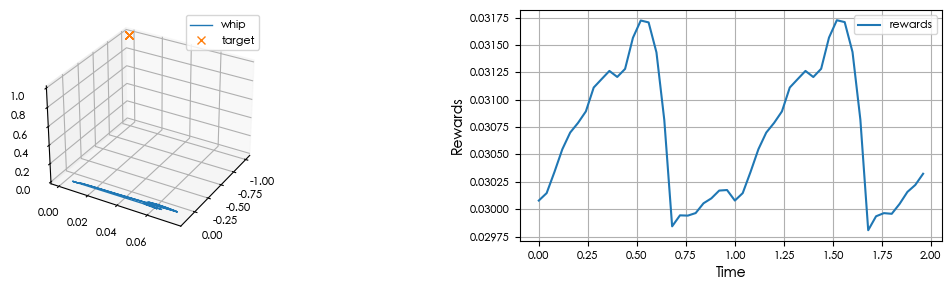

In [55]:
%matplotlib inline
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.rc("font",family='Heiti TC')

source = np.array([obs['arm/whip/whip_end_xpos'] for obs in observations]).squeeze().T
target = np.array([obs['target/target_xpos'] for obs in observations]).squeeze().T
rewards = np.array(rewards).squeeze()
ctrls = np.array(ctrls).squeeze()

fig = plt.figure(figsize=(12, 3))
canvas = FigureCanvas(fig)
ax0 = fig.add_subplot(131, projection='3d')
ax0.plot(source[0], source[1], source[2], lw=1, label="whip")  # Plot contour curves
ax0.plot(target[0], target[1], target[2], "x", label="target")  # Plot contour curves
# 调整视角
ax0.view_init(30, 30)
ax0.legend()
ax1 = fig.add_subplot(122)
times = np.arange(len(rewards)) * env.control_timestep()
ax1.plot(times,rewards,label="rewards")
ax1.legend()
ax1.grid()
ax1.set_xlabel("Time"); ax1.set_ylabel("Rewards")
plt.show()

In [60]:
ax0.get_xlim(), ax0.get_ylim(), ax0.get_zlim()

((-1.058323759260688, 0.2247989444744501),
 (-0.0038091725217960157, 0.07999262295771634),
 (-0.001304806003406541, 1.0))

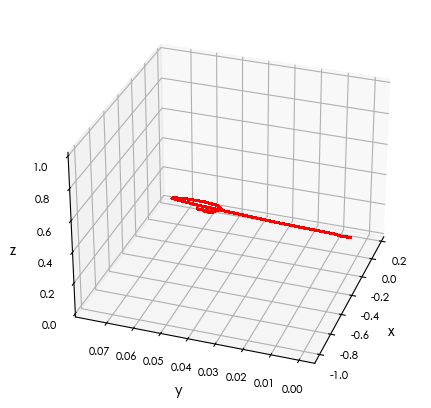

In [71]:
# make a video for the 3d scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
target_ = target[:, 0:target.shape[1]//2]
source_ = source[:, 0:source.shape[1]//2]
# create animation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(*ax0.get_xlim())
ax.set_ylim(*ax0.get_ylim())
ax.set_zlim(*ax0.get_zlim())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# pc = ax.scatter(target_[0, 0], target_[1, 0], target_[2, 0], 'x', s=100, alpha=0.5, label="targets")
# ln = ax.plot(source_[0, 0:2], source_[1, 0:2], source_[2, 0:2], alpha=0.5, label="whip end")

# ax.view_init(30, 30)
def update(i):
    ax.view_init(30, i)
    # ax.scatter(target_[0, 0], target_[1, 0], target_[2, 0], 'x', alpha=0.5, label="targets")
    ax.plot(source_[0, 0:i+1], source_[1, 0:i+1], source_[2, 0:i+1], c='r', alpha=0.5, label="whip end")
    return ax
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, 200, 1), interval=30)
HTML(anim.to_html5_video())

动作空间的分布（假设每个动作维度都是独立的高斯分布，也可以假设成beta分布，一些研究表明beta分布假设更好）

/var/folders/0g/4n6rzj1n21n6dlmfrdjkpj9m0000gn/T/ipykernel_1355/2942449066.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  init_obs = np.hstack(env.reset().observation.values()) # flatten the observation


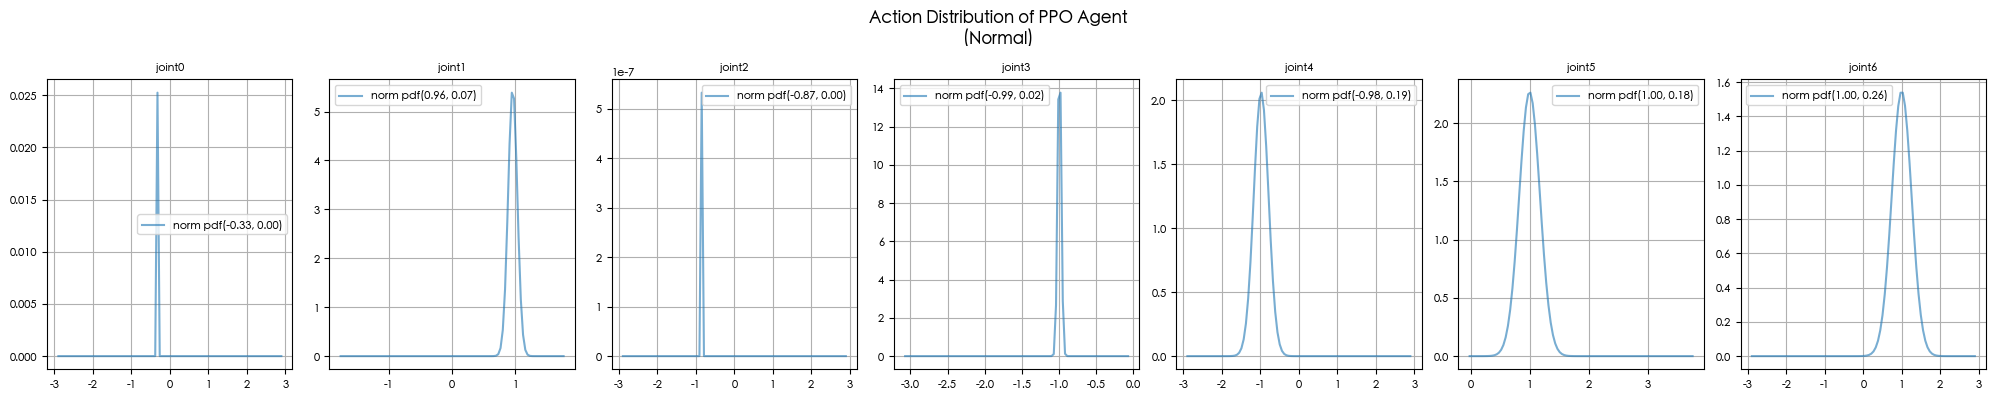

In [50]:
from torch.nn import functional as F
from scipy.stats import norm
import matplotlib.pyplot as plt
def get_distribution(agent, x):
    with torch.no_grad():
        mu = agent.actor_mean(x)[0].cpu().numpy()
        sigma = agent.actor_logstd.exp()[0].cpu().numpy()
    high, low = env.action_spec().maximum, env.action_spec().minimum
    fig, axes = plt.subplots(1, len(mu), figsize=(20, 4))
    for i in range(len(mu)):
        x = np.linspace(low[i], high[i], 100)
        axes[i].plot(x, norm.pdf(x, mu[i], sigma[i]), alpha=0.6, label=f'norm pdf({mu[i]:.2f}, {sigma[i]:.2f})')
        axes[i].grid()
        axes[i].legend()
        axes[i].set_title(f"joint{i}")
    plt.suptitle("Action Distribution of PPO Agent\n(Normal)")
    plt.tight_layout()
    plt.show()
    
init_obs = np.hstack(env.reset().observation.values()) # flatten the observation
init_obs = torch.Tensor(init_obs).to(device)
get_distribution(agent, init_obs)

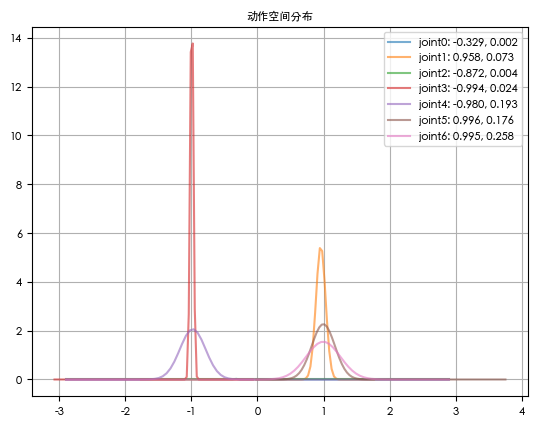

In [51]:
from torch.nn import functional as F
from scipy.stats import norm
import matplotlib.pyplot as plt
def get_distribution(agent, x):
    with torch.no_grad():
        mu = agent.actor_mean(x)[0].cpu().numpy()
        sigma = agent.actor_logstd.exp()[0].cpu().numpy()
    high, low = env.action_spec().maximum, env.action_spec().minimum
    for i in range(len(mu)):
        x = np.linspace(low[i], high[i], 100)
        plt.plot(x, norm.pdf(x, mu[i], sigma[i]), alpha=0.6, label=f"joint{i}: {mu[i]:.3f}, {sigma[i]:.3f}")
    plt.title("动作空间分布")
    plt.legend()
    plt.grid()
    plt.show()
    
init_obs = np.hstack(list(env.reset().observation.values())) # flatten the observation
init_obs = torch.Tensor(init_obs).to(device)
get_distribution(agent, init_obs)